In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf

In [2]:
os.listdir("./Data")

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [3]:
pd.set_option('display.max_columns', None)

### Data Understanding

#### Application Data

In [4]:
train_data = pd.read_csv("./Data/application_train.csv")
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
train_data.shape

(307511, 122)

In [6]:
cat_cols = train_data.dtypes[train_data.dtypes == "O"].index
num_cols = train_data.dtypes[train_data.dtypes != "O"].index

print("Categorical Columns:", len(cat_cols))
print("Numerical Columns:", len(num_cols))

Categorical Columns: 16
Numerical Columns: 106


In [7]:
print("List of Categorical Columns:")
print(list(cat_cols),"\n")

print("List of Numerical Columns:")
print(list(num_cols))

List of Categorical Columns:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'] 

List of Numerical Columns:
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1'

In [8]:
train_data.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [9]:
# Unique values of categorical columns
for col in cat_cols:
    print(f"{col}: {train_data[col].unique()}")

NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
CODE_GENDER: ['M' 'F' 'XNA']
FLAG_OWN_CAR: ['N' 'Y']
FLAG_OWN_REALTY: ['Y' 'N']
NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skil

In [10]:
# Number of Unique values of categorical columns
for col in cat_cols:
    print(f"{col}: {train_data[col].nunique()}")

NAME_CONTRACT_TYPE: 2
CODE_GENDER: 3
FLAG_OWN_CAR: 2
FLAG_OWN_REALTY: 2
NAME_TYPE_SUITE: 7
NAME_INCOME_TYPE: 8
NAME_EDUCATION_TYPE: 5
NAME_FAMILY_STATUS: 6
NAME_HOUSING_TYPE: 6
OCCUPATION_TYPE: 18
WEEKDAY_APPR_PROCESS_START: 7
ORGANIZATION_TYPE: 58
FONDKAPREMONT_MODE: 4
HOUSETYPE_MODE: 3
WALLSMATERIAL_MODE: 7
EMERGENCYSTATE_MODE: 2


In [11]:
na_vals = train_data.isnull().sum()

print("Number of nan Cols:", len(na_vals[na_vals>0].index))

Number of nan Cols: 67


In [12]:
na_vals[na_vals>0][na_vals[na_vals>0]<1000]

AMT_ANNUITY                12
AMT_GOODS_PRICE           278
CNT_FAM_MEMBERS             2
EXT_SOURCE_2              660
DAYS_LAST_PHONE_CHANGE      1
dtype: int64

#### Bureau

In [13]:
bureau = pd.read_csv("./Data/bureau.csv")
bureau.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


#### Bureau Balance

In [14]:
bureau_balance = pd.read_csv("./Data/bureau_balance.csv")
bureau_balance.head(10)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


#### Previous Application

In [15]:
prev_app = pd.read_csv("./Data/previous_application.csv")
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
prev_app.shape

(1670214, 37)

#### POS Cash Balance

In [17]:
cash_balance = pd.read_csv("./Data/POS_CASH_balance.csv")
cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


### Data Preparation

#### Feature Selection (Categorical)

In [18]:
for col in cat_cols:
    print(f"{col}: {train_data[col].unique()}")

NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
CODE_GENDER: ['M' 'F' 'XNA']
FLAG_OWN_CAR: ['N' 'Y']
FLAG_OWN_REALTY: ['Y' 'N']
NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skil

In [19]:
preprocessed_cat_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

print("Preprocessed Categorical Columns:", len(preprocessed_cat_cols))

Preprocessed Categorical Columns: 7


#### Feature Selection (Numerical)

In [20]:
train_data[num_cols]

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [21]:
num_cols.to_list()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [22]:
preprocessed_num_cols = ['SK_ID_CURR', 'TARGET','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
                         'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'CNT_FAM_MEMBERS']

print("Preprocessed Numerical Columns:", len(preprocessed_num_cols))

Preprocessed Numerical Columns: 9


In [23]:
new_cols = preprocessed_num_cols + preprocessed_cat_cols
preprocessed_data = train_data[new_cols]
preprocessed_data.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,100002,1,202500.0,406597.5,24700.5,351000.0,-637,1,1.0,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,-1188,1,2.0,N,N,Family,State servant,Higher education,Married,House / apartment
2,100004,0,67500.0,135000.0,6750.0,135000.0,-225,1,1.0,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
3,100006,0,135000.0,312682.5,29686.5,297000.0,-3039,1,2.0,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment
4,100007,0,121500.0,513000.0,21865.5,513000.0,-3038,1,1.0,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment


In [24]:
preprocessed_data.shape

(307511, 16)

#### Missing Values

In [25]:
preprocessed_data.isnull().sum()[preprocessed_data.isnull().sum()>0]

AMT_ANNUITY          12
AMT_GOODS_PRICE     278
CNT_FAM_MEMBERS       2
NAME_TYPE_SUITE    1292
dtype: int64

In [26]:
nan_values = preprocessed_data[preprocessed_data.isna().any(axis=1)]
nan_values.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
64,100076,0,180000.0,315000.0,9679.5,315000.0,-2546,1,2.0,Y,N,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment
724,100837,0,45000.0,135000.0,6750.0,NaN,-381,1,4.0,N,Y,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment
1199,101414,0,135000.0,533668.5,34636.5,477000.0,-2393,1,2.0,Y,N,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment
1669,101954,0,153000.0,1162170.0,30654.0,832500.0,-1839,1,3.0,Y,N,NaN,State servant,Higher education,Separated,House / apartment
1862,102183,0,121500.0,268659.0,13774.5,243000.0,-2822,1,2.0,Y,N,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment


In [27]:
nan_values.shape

(1304, 16)

In [28]:
pct_nan_cells = len(nan_values)/len(preprocessed_data)
print("Missing values: {:.2%}".format(pct_nan_cells))

Missing values: 0.42%


In [29]:
preprocessed_data = preprocessed_data.dropna()

#### Handle Outliers

In [30]:
preprocessed_num_cols

['SK_ID_CURR',
 'TARGET',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'CNT_FAM_MEMBERS']

AMT_INCOME_TOTAL    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

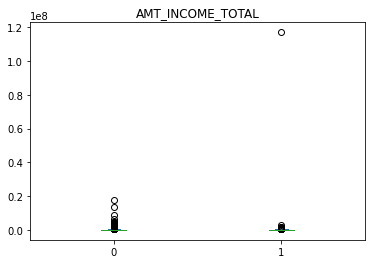

In [31]:
preprocessed_data.plot.box(column="AMT_INCOME_TOTAL", by="TARGET")

In [32]:
del_idx = list(preprocessed_data[preprocessed_data["AMT_INCOME_TOTAL"]>1e8].index)
preprocessed_data.drop(del_idx, inplace=True)

AMT_INCOME_TOTAL    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

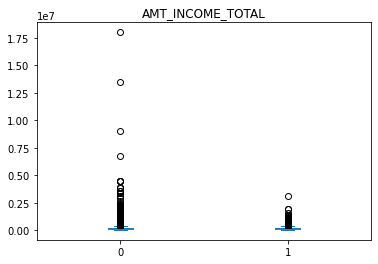

In [33]:
preprocessed_data.plot.box(column="AMT_INCOME_TOTAL", by="TARGET")

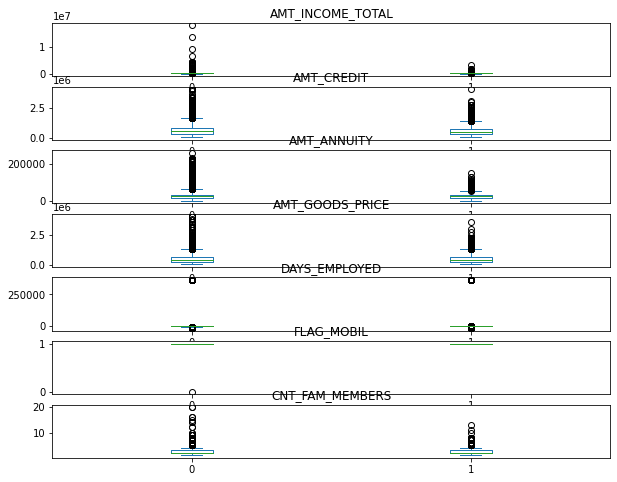

In [34]:
num_x_cols = preprocessed_num_cols[2:]

fig, axs = plt.subplots(len(num_x_cols), figsize=(10, 8))
 
for idx, col in enumerate(num_x_cols):
    preprocessed_data.plot.box(column=col, by="TARGET", ax=axs[idx])

### Exploratory Data Analysis

In [35]:
preprocessed_data.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,100002,1,202500.0,406597.5,24700.5,351000.0,-637,1,1.0,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,-1188,1,2.0,N,N,Family,State servant,Higher education,Married,House / apartment
2,100004,0,67500.0,135000.0,6750.0,135000.0,-225,1,1.0,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
3,100006,0,135000.0,312682.5,29686.5,297000.0,-3039,1,2.0,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment
4,100007,0,121500.0,513000.0,21865.5,513000.0,-3038,1,1.0,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment


C:\Users\darel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Density'>

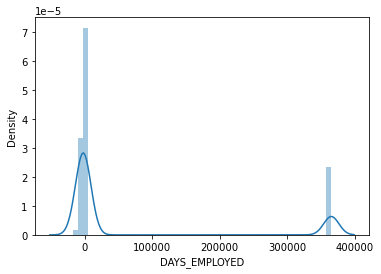

In [36]:
sns.distplot(preprocessed_data["DAYS_EMPLOYED"])

In [37]:
outlier_days = np.max(preprocessed_data["DAYS_EMPLOYED"])
preprocessed_data[preprocessed_data["DAYS_EMPLOYED"]==outlier_days] = np.min(preprocessed_data["DAYS_EMPLOYED"])

C:\Users\darel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Density'>

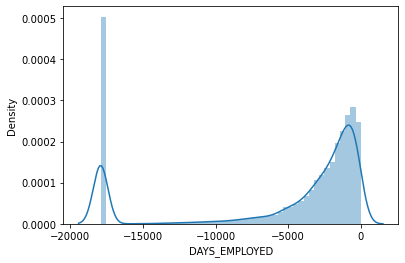

In [38]:
sns.distplot(preprocessed_data["DAYS_EMPLOYED"])

<AxesSubplot:xlabel='NAME_TYPE_SUITE', ylabel='AMT_INCOME_TOTAL'>

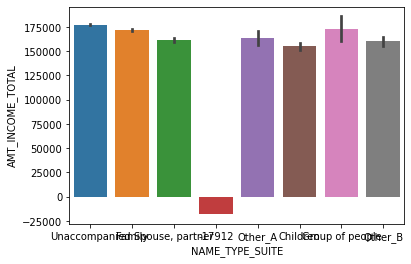

In [39]:
sns.barplot(data=preprocessed_data, x="NAME_TYPE_SUITE", y="AMT_INCOME_TOTAL")

In [40]:
outliers_suite = list(preprocessed_data[preprocessed_data["NAME_TYPE_SUITE"] == -17912].index)
preprocessed_data.drop(outliers_suite, inplace=True)

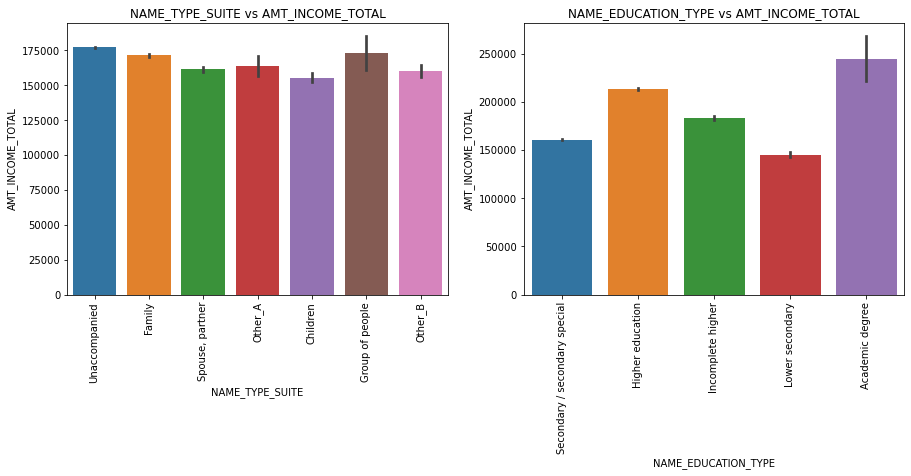

In [41]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(data=preprocessed_data, x="NAME_TYPE_SUITE", y="AMT_INCOME_TOTAL", ax=ax[0]).set_title("NAME_TYPE_SUITE vs AMT_INCOME_TOTAL")
ax[0].set_xticklabels(labels=preprocessed_data["NAME_TYPE_SUITE"].unique(), rotation=90)

sns.barplot(data=preprocessed_data, x="NAME_EDUCATION_TYPE", y="AMT_INCOME_TOTAL", ax=ax[1]).set_title("NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL")
ax[1].set_xticklabels(labels=preprocessed_data["NAME_EDUCATION_TYPE"].unique(), rotation=90)
plt.show()

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='TARGET'>

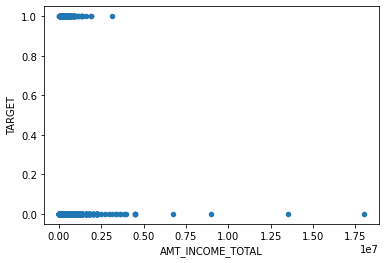

In [42]:
preprocessed_data.plot(x="AMT_INCOME_TOTAL", y="TARGET", kind="scatter")

### Transformation

In [43]:
preprocessed_data.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,100002,1,202500.0,406597.5,24700.5,351000.0,-637,1,1.0,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,-1188,1,2.0,N,N,Family,State servant,Higher education,Married,House / apartment
2,100004,0,67500.0,135000.0,6750.0,135000.0,-225,1,1.0,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
3,100006,0,135000.0,312682.5,29686.5,297000.0,-3039,1,2.0,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment
4,100007,0,121500.0,513000.0,21865.5,513000.0,-3038,1,1.0,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment


In [44]:
for col in preprocessed_cat_cols:
    print(f"{col}: {preprocessed_data[col].unique()}")

FLAG_OWN_CAR: ['N' 'Y']
FLAG_OWN_REALTY: ['Y' 'N']
NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Other_A' 'Children'
 'Group of people' 'Other_B']
NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Student' 'Pensioner'
 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [45]:
preprocessed_data.drop("NAME_TYPE_SUITE", axis=1, inplace=True)

In [46]:
preprocessed_data["FLAG_OWN_CAR"] = preprocessed_data["FLAG_OWN_CAR"].map({"N": 0, "Y": 1})
preprocessed_data["FLAG_OWN_REALTY"] = preprocessed_data["FLAG_OWN_REALTY"].map({"N": 0, "Y": 1})

In [47]:
# drop_first = Businessman
inc_types = pd.get_dummies(preprocessed_data["NAME_INCOME_TYPE"], drop_first=True)

# Concatenate 2 dataframes
preprocessed_data = pd.concat([preprocessed_data, inc_types], axis=1)

# Drop NAME_INCOME_TYPE
preprocessed_data.drop("NAME_INCOME_TYPE", axis=1, inplace=True)

In [48]:
preprocessed_data["NAME_EDUCATION_TYPE"] = preprocessed_data["NAME_EDUCATION_TYPE"].map(
    {'Lower secondary': 0,
     'Secondary / secondary special': 1,
     'Incomplete higher': 2,
     'Higher education': 3,
     'Academic degree': 4}
)

In [49]:
def status_to_num(status):
    if status in ['Married', 'Civil marriage']:
        return 1
    else:
        return 0
    
preprocessed_data["NAME_FAMILY_STATUS"] = preprocessed_data["NAME_FAMILY_STATUS"].apply(status_to_num)

In [50]:
def housing_to_num(status):
    if status in ['House / apartment', 'With parents']:
        return 1
    else:
        return 0
    
preprocessed_data["NAME_HOUSING_TYPE"] = preprocessed_data["NAME_HOUSING_TYPE"].apply(housing_to_num)

### Model Building

In [51]:
preprocessed_data.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Commercial associate,Maternity leave,Pensioner,State servant,Student,Working
0,100002,1,202500.0,406597.5,24700.5,351000.0,-637,1,1.0,0,1,1,0,1,0,0,0,0,0,1
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,-1188,1,2.0,0,0,3,1,1,0,0,0,1,0,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,-225,1,1.0,1,1,1,0,1,0,0,0,0,0,1
3,100006,0,135000.0,312682.5,29686.5,297000.0,-3039,1,2.0,0,1,1,1,1,0,0,0,0,0,1
4,100007,0,121500.0,513000.0,21865.5,513000.0,-3038,1,1.0,0,1,1,0,1,0,0,0,0,0,1


In [52]:
preprocessed_data.columns

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'CNT_FAM_MEMBERS',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'Commercial associate',
       'Maternity leave', 'Pensioner', 'State servant', 'Student', 'Working'],
      dtype='object')

In [53]:
X = preprocessed_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'CNT_FAM_MEMBERS',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'Commercial associate',
       'Maternity leave', 'Pensioner', 'State servant', 'Student', 'Working']]
y = preprocessed_data["TARGET"]

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [56]:
y_pred = log_reg.predict(X_valid)

In [57]:
sum(y_pred)/len(y_pred)

0.0

In [58]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Nilai prediksi nya 0 semua

In [59]:
# Proporsi nilai target pada dataset
target_counts = preprocessed_data["TARGET"].value_counts()
target_counts

0    229255
1     21773
Name: TARGET, dtype: int64

In [60]:
target_0 = target_counts.loc[0]/sum(target_counts)
target_1 = target_counts.loc[1]/sum(target_counts)

print("Target 0: {:.2%}".format(target_0))
print("Target 1: {:.2%}".format(target_1))

Target 0: 91.33%
Target 1: 8.67%


Penyebab gagal karena unbalanced data yang sangat signifikan.

### Resampling

In [61]:
from imblearn.under_sampling import RandomUnderSampler
sam = RandomUnderSampler(random_state=0)

new_X_train, new_y_train = sam.fit_resample(X_train, y_train)

In [62]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")

new_X_train, new_y_train = smote.fit_resample(X_train, y_train)

In [63]:
pd.concat([new_X_train, new_y_train], axis=1)["TARGET"].value_counts()

0    160551
1    160551
Name: TARGET, dtype: int64

### Model Building (2)

#### Logistic Regression

In [64]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(new_X_train, new_y_train)

LogisticRegression(random_state=0)

In [65]:
y_pred = log_reg.predict(X_valid)

In [66]:
sum(y_pred)/len(y_pred)

0.4031390670437796

In [67]:
# Mengevaluasi apakah model belajar pada training dataset atau tidak
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_valid))

              precision    recall  f1-score   support

           0       0.61      0.93      0.74     44949
           1       0.55      0.12      0.20     30360

    accuracy                           0.61     75309
   macro avg       0.58      0.53      0.47     75309
weighted avg       0.59      0.61      0.52     75309



#### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, min_samples_split=50)
rfc.fit(new_X_train, new_y_train)

RandomForestClassifier(min_samples_split=50, n_estimators=200)

In [69]:
y_pred = rfc.predict(X_valid)

In [70]:
sum(y_pred)/len(y_pred)

0.040619315088502035

In [71]:
# Mengevaluasi apakah model belajar pada training dataset atau tidak
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_valid))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     72250
           1       0.07      0.16      0.10      3059

    accuracy                           0.88     75309
   macro avg       0.52      0.54      0.52     75309
weighted avg       0.93      0.88      0.90     75309



### Model Testing

In [72]:
test_data = pd.read_csv("./Data/application_test.csv")
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [73]:
test_data.shape

(48744, 121)

In [74]:
test_data.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [75]:
new_test_cols = [col for col in new_cols if col != "TARGET"]
new_test_cols

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'CNT_FAM_MEMBERS',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [76]:
test_data = test_data[new_test_cols]
test_data.isnull().sum()

SK_ID_CURR               0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY             24
AMT_GOODS_PRICE          0
DAYS_EMPLOYED            0
FLAG_MOBIL               0
CNT_FAM_MEMBERS          0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
NAME_TYPE_SUITE        911
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
dtype: int64

In [77]:
test_data.dropna(inplace=True)

In [78]:
test_data.isnull().sum()

SK_ID_CURR             0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
CNT_FAM_MEMBERS        0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
dtype: int64

In [79]:
# Preprocessing Test Dataset

test_data.drop("NAME_TYPE_SUITE", axis=1, inplace=True)
test_data["FLAG_OWN_CAR"] = test_data["FLAG_OWN_CAR"].map({"N": 0, "Y": 1})
test_data["FLAG_OWN_REALTY"] = test_data["FLAG_OWN_REALTY"].map({"N": 0, "Y": 1})

# drop_first = Businessman
inc_types = pd.get_dummies(test_data["NAME_INCOME_TYPE"], drop_first=True)

# Concatenate 2 dataframes
test_data = pd.concat([test_data, inc_types], axis=1)

# Drop NAME_INCOME_TYPE
test_data.drop("NAME_INCOME_TYPE", axis=1, inplace=True)
test_data["NAME_EDUCATION_TYPE"] = test_data["NAME_EDUCATION_TYPE"].map(
    {'Lower secondary': 0,
     'Secondary / secondary special': 1,
     'Incomplete higher': 2,
     'Higher education': 3,
     'Academic degree': 4}
)

test_data["NAME_FAMILY_STATUS"] = test_data["NAME_FAMILY_STATUS"].apply(status_to_num)
test_data["NAME_HOUSING_TYPE"] = test_data["NAME_HOUSING_TYPE"].apply(housing_to_num)

In [80]:
test_data.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Commercial associate,Pensioner,State servant,Student,Unemployed,Working
0,100001,135000.0,568800.0,20560.5,450000.0,-2329,1,2.0,0,1,3,1,1,0,0,0,0,0,1
1,100005,99000.0,222768.0,17370.0,180000.0,-4469,1,2.0,0,1,1,1,1,0,0,0,0,0,1
3,100028,315000.0,1575000.0,49018.5,1575000.0,-1866,1,4.0,0,1,1,1,1,0,0,0,0,0,1
4,100038,180000.0,625500.0,32067.0,625500.0,-2191,1,3.0,1,0,1,1,1,0,0,0,0,0,1
5,100042,270000.0,959688.0,34600.5,810000.0,-12009,1,2.0,1,1,1,1,1,0,0,1,0,0,0


In [81]:
test_data.shape

(47809, 19)

In [82]:
X_test = test_data.iloc[:,1:]
y_pred = rfc.predict(X_test)

C:\Users\darel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unemployed
Feature names seen at fit time, yet now missing:
- Maternity leave

  warnings.warn(message, FutureWarning)


In [83]:
test_data["Prediction"] = y_pred
test_data.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Commercial associate,Pensioner,State servant,Student,Unemployed,Working,Prediction
0,100001,135000.0,568800.0,20560.5,450000.0,-2329,1,2.0,0,1,3,1,1,0,0,0,0,0,1,0
1,100005,99000.0,222768.0,17370.0,180000.0,-4469,1,2.0,0,1,1,1,1,0,0,0,0,0,1,0
3,100028,315000.0,1575000.0,49018.5,1575000.0,-1866,1,4.0,0,1,1,1,1,0,0,0,0,0,1,0
4,100038,180000.0,625500.0,32067.0,625500.0,-2191,1,3.0,1,0,1,1,1,0,0,0,0,0,1,0
5,100042,270000.0,959688.0,34600.5,810000.0,-12009,1,2.0,1,1,1,1,1,0,0,1,0,0,0,1
